# Clasificador de imagenes

Dar como entrada a la red neuronal una imagen
- Si tomamos una imagen y la convertimos a blanco y negro podemos dar un numero a cada pixel (0 : negro, 255: blanco)
- Una imagen de 100*100 de 100.000 pixeles, 100.000 neuronas,
- La reducimos a 28*28 = 784 pixeles, 784 neuronas

- 784 neuronas de ENTRADA, 10 neuronas de SALIDA

# Red neuronal convolucional 

- Utilizada para clasificacion de imagenes

- Se utilizara zalando para traer 70000 imagenes de entrenamiento

# Importacion de librerias

In [2]:
!pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   -------- ------------------------------- 1.1/5.1 MB 22.2 MB/s eta 0:00:01
   ------------------------ --------------- 3.1/5.1 MB 32.8 MB/s eta 0:00:01
   ------------------------------------- -- 4.8/5.1 MB 33.9 MB/s eta 0:00:01
   ---------------------------------------- 5.1/5.1 MB 32.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/161.5 kB ? eta -:--:--
   ---------------------------------------- 161.5/161.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
   ---------------------------------------- 101.3/101.3 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/113.6 kB ? eta -:--:--
   


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\VICTUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [10]:
import matplotlib.pyplot as plt

In [22]:
import math

# Datos de entrenamiento y de prueba

In [4]:
datos, metadatos = tfds.load('fashion_mnist',as_supervised=True, with_info=True ) #nos traemos datos de tensorflow

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  75%|███████▌  | 3/4 [00:02<00:00,  1.24 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:04<00:00,  1.20s/ url]


Dataset fashion_mnist downloaded and prepared to C:\Users\VICTUS\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
metadatos #informacion del set que descargamos, pdoemos ver que tenemos 60000 datos de entrenamiento y 10000 de prueba

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='C:\\Users\\VICTUS\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
  

In [6]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test'] #separamos los datos de entrenamiento y de prueba

In [7]:
nombres_clases = metadatos.features['label'].names

In [8]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Normalizacion de los datos 

- Pasamos de 0-255 a 0-1

In [9]:
def normalizar (imagenes, etiquetas):
    imagenes = tf.cast(imagenes,tf.float32)
    imagenes /= 255 #aca se pasa de 0-255 a 0-1
    return imagenes, etiquetas

#normalizamos todos los datos de entrenamiento y prueba con la funcion de normalizacion
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#agregamos los datos a memoria cache (usando memoria en lugar de disco, el entrenamiento es mucho mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

# Imagen de prueba

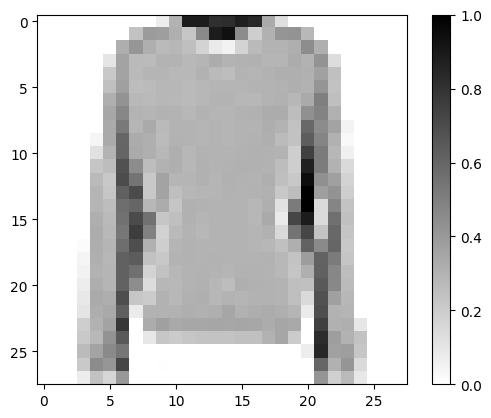

In [12]:
#se muestra la primera imagen de los datos de prueba
for imagen, etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagen.numpy().reshape((28,28)) #redimensionamos

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()



### Varias imagenes

Imprimimos varias imagenes para ver cual es la categoria correcta con la que viene etiquetada

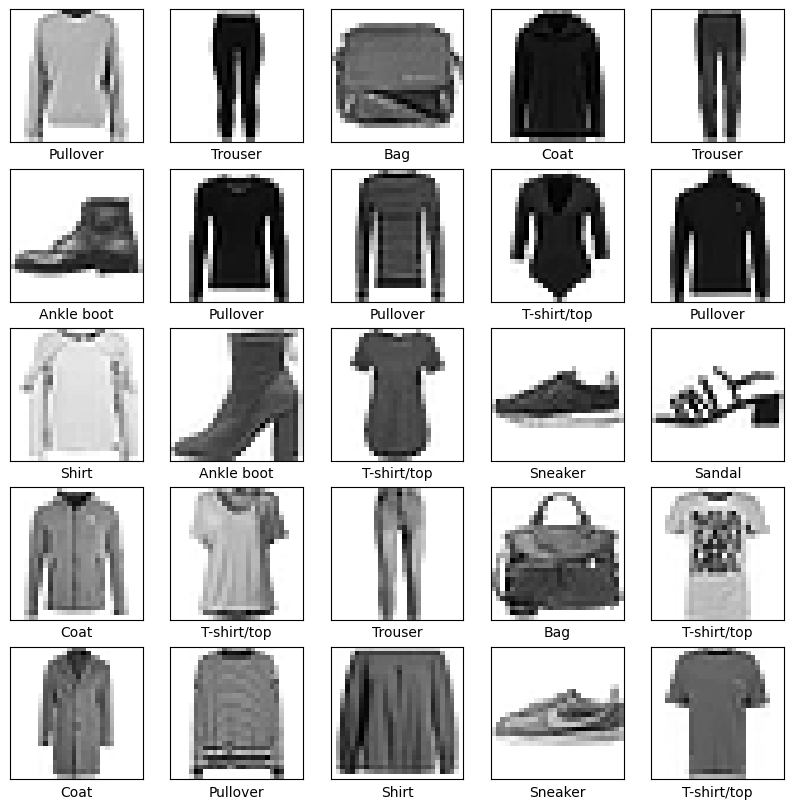

In [14]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate (datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
plt.show()

# Modelo

In [15]:
modelo =  tf.keras.Sequential([
    #definimos la capa de entrada manualmente y usaremos una de tipo flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #de 28*28 y un canal por ser blanco y negro (1 - b y n) -- flatten lo que ace es aplastar la matirz a una sola dimension con 784 neuronas cada una
    #definimos las capas ocultas densas con 50 neuronas cada una
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    #definimos la capa de salida con 10 neuronas 
    tf.keras.layers.Dense(50, activation=tf.nn.softmax), #se usa la funcion softmax como funcion de activacion de la caoa de salida en las redes de clasificacion
])

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compilacion del modelo

In [20]:
modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), #funcion de perdida, se usa en redes de clasificacion
    metrics = ['accuracy']
)

Para hacer que la red entrene ma rapido podemos definirla en lotes

In [17]:
num_ej_entrenamiento = metadatos.splits['train'].num_examples
num_ej_pruebas = metadatos.splits['test'].num_examples
print (num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [21]:
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE) 
# repeat y shuffle --> repeticiones de manera aleatoria
#batch --> le inidcamos el tamanio de lote y que se haga mas rapido
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)


# Entrenamiento

In [23]:
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))
#epochs = 5 --> cuantas vueltas queremos darle

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 963us/step - accuracy: 0.7381 - loss: 0.8228
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8541 - loss: 0.4057
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.8670 - loss: 0.3636
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8750 - loss: 0.3402
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.8839 - loss: 0.3217


La idea seria poder terminar con un accuracy del 88%

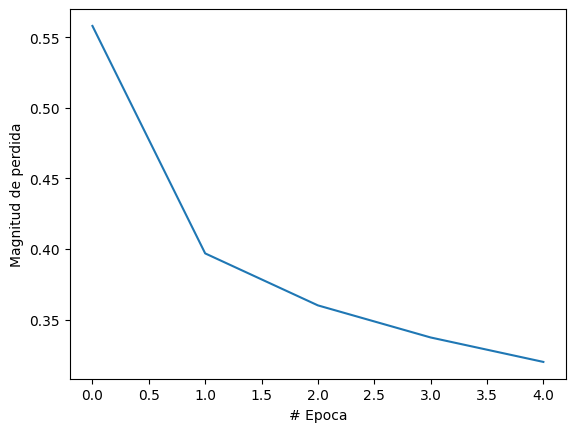

In [24]:
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

# Predicciones

- Si es correcta la prediccion se ve en color azul, caso contrario en clor rojo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


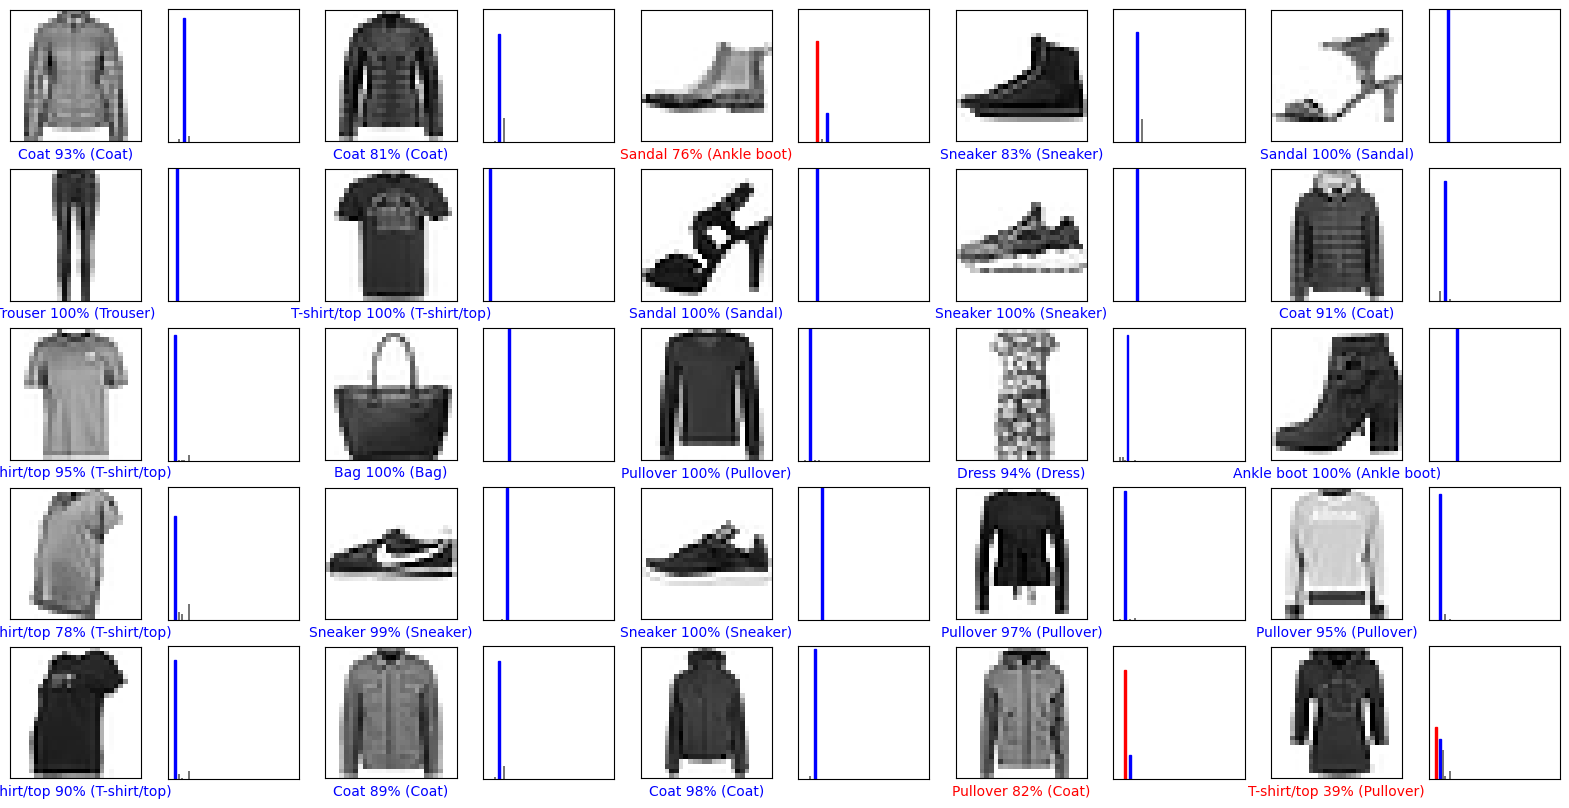

In [28]:
import numpy as np
import matplotlib.pyplot as plt


for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(len(arr_predicciones)), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))

for i in range(num_imagenes):
  plt.subplot(filas, 2 * columnas, 2 * i + 1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2 * columnas, 2 * i + 2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.show()


### Prediccion de una imagen

In [32]:
#Probar una imagen suelta
imagen = imagenes_prueba[4] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediccion: Sandal


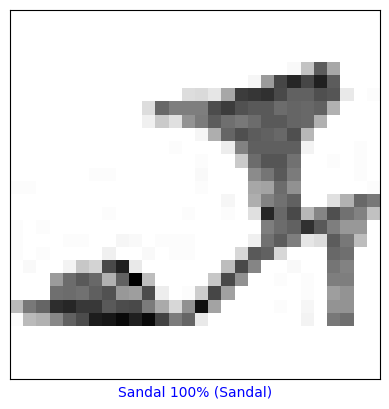

In [33]:
plt.figure()
plt.imshow(imagen[0][..., 0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])

# Obtener la etiqueta de la predicción y la etiqueta real
etiqueta_prediccion = np.argmax(prediccion[0])
etiqueta_real = etiquetas_prueba[4]

# Determinar el color de la etiqueta
color = 'blue' if etiqueta_prediccion == etiqueta_real else 'red'

# Mostrar la etiqueta de la predicción
plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                     100 * np.max(prediccion[0]),
                                     nombres_clases[etiqueta_real]),
           color=color)
plt.show()